In [5]:
from __future__ import print_function
import numpy as np    
import csv
import copy
import pandas
import random
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, ExpSineSquared
from sklearn.gaussian_process.kernels import Matern, RationalQuadratic
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared
from scipy import stats


# Read data from csv file

In [6]:
    # Read Data
ifile  = open('Data.csv', "rt")
reader = csv.reader(ifile)
csvdata=[]
for row in reader:
        csvdata.append(row)   
ifile.close()
numrow=len(csvdata)
numcol=len(csvdata[0]) 
csvdata = np.array(csvdata).reshape(numrow,numcol)
ID = csvdata[:,0]
formula = csvdata[:,4]
latt = csvdata[:,5]
dir_gap = csvdata[:,6]
ind_gap  = csvdata[:,7]
form  = csvdata[:,8]
X = csvdata[:,9:]

prop = copy.deepcopy(form)

XX = copy.deepcopy(X)
n = ID.size
m = int(X.size/n)


# Split data into training and test sets

In [7]:
t = 75

X_train, X_test, Prop_train, Prop_test, ID_train, ID_test, formula_train, formula_test = train_test_split(XX, prop, ID, formula, test_size=t)

n_tr = len(Prop_train)
n_te = len(Prop_test)
    
X_train_fl = np.array(X_train, dtype="float32")
X_test_fl = np.array(X_test, dtype="float32")
Prop_train_fl = np.array(Prop_train, dtype="float32")
Prop_test_fl = np.array(Prop_test, dtype="float32")


# Define and train Random Forest model

In [11]:
 ##  Define Random Forest Hyperparameter Space  ##
param_grid = {
"n_estimators": [100, 200],
#"max_features": [10, 30, m],
"min_samples_leaf": [10, 20],
"max_depth": [10, 20, 40],
"min_samples_split": [2, 5, 10]
}
param_grid = { "n_estimators": [100]}

rfreg_opt = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
rfreg_opt.fit(X_train_fl, Prop_train_fl)
Pred_train_fl = rfreg_opt.predict(X_train_fl)
Pred_test_fl = rfreg_opt.predict(X_test_fl)


# Calculate prediction errors

In [12]:
mse_test_prop = sklearn.metrics.mean_squared_error(Prop_test_fl,Pred_test_fl)
mse_train_prop = sklearn.metrics.mean_squared_error(Prop_train_fl,Pred_train_fl)

print('rmse_test_prop=', np.sqrt(mse_test_prop))
print('rmse_train_prop=', np.sqrt(mse_train_prop))

np.savetxt('Prop_train.txt', Prop_train_fl)
np.savetxt('Pred_train.txt', Pred_train_fl)
np.savetxt('Prop_test.txt', Prop_test_fl)
np.savetxt('Pred_test.txt', Pred_test_fl)


mse_train = sklearn.metrics.mean_squared_error(Prop_train_fl, Pred_train_fl)
rmse_train = np.sqrt(mse_train_prop)
mae_train = sklearn.metrics.mean_absolute_error(Prop_train_fl, Pred_train_fl)
r2_train = sklearn.metrics.r2_score(Prop_train_fl, Pred_train_fl)
R_train = stats.pearsonr(Prop_train_fl, Pred_train_fl)[0]

mse_test = sklearn.metrics.mean_squared_error(Prop_test_fl, Pred_test_fl)
rmse_test = np.sqrt(mse_test_prop)
mae_test = sklearn.metrics.mean_absolute_error(Prop_test_fl, Pred_test_fl)
r2_test = sklearn.metrics.r2_score(Prop_test_fl,Pred_test_fl)
R_test = stats.pearsonr(Prop_test_fl,Pred_test_fl)[0]

text_file = open("errors.txt", "w")
text_file.write("MSE_train: %s" % mse_train + '\n')
text_file.write("RMSE_train: %s" % rmse_train + '\n')
text_file.write("MAE_train: %s" % mae_train + '\n')
text_file.write("r2_train: %s" % r2_train + '\n')
text_file.write("R_train: %s" % R_train + '\n')
text_file.write("MSE_test: %s" % mse_test + '\n')
text_file.write("RMSE_test: %s" % rmse_test + '\n')
text_file.write("MAE_test: %s" % mae_test + '\n')
text_file.write("r2_test: %s" % r2_test + '\n')
text_file.write("R_test: %s" % R_test + '\n')
text_file.close()


rmse_test_prop= 0.1797842150936278
rmse_train_prop= 0.07499753190802844


# Plot results

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


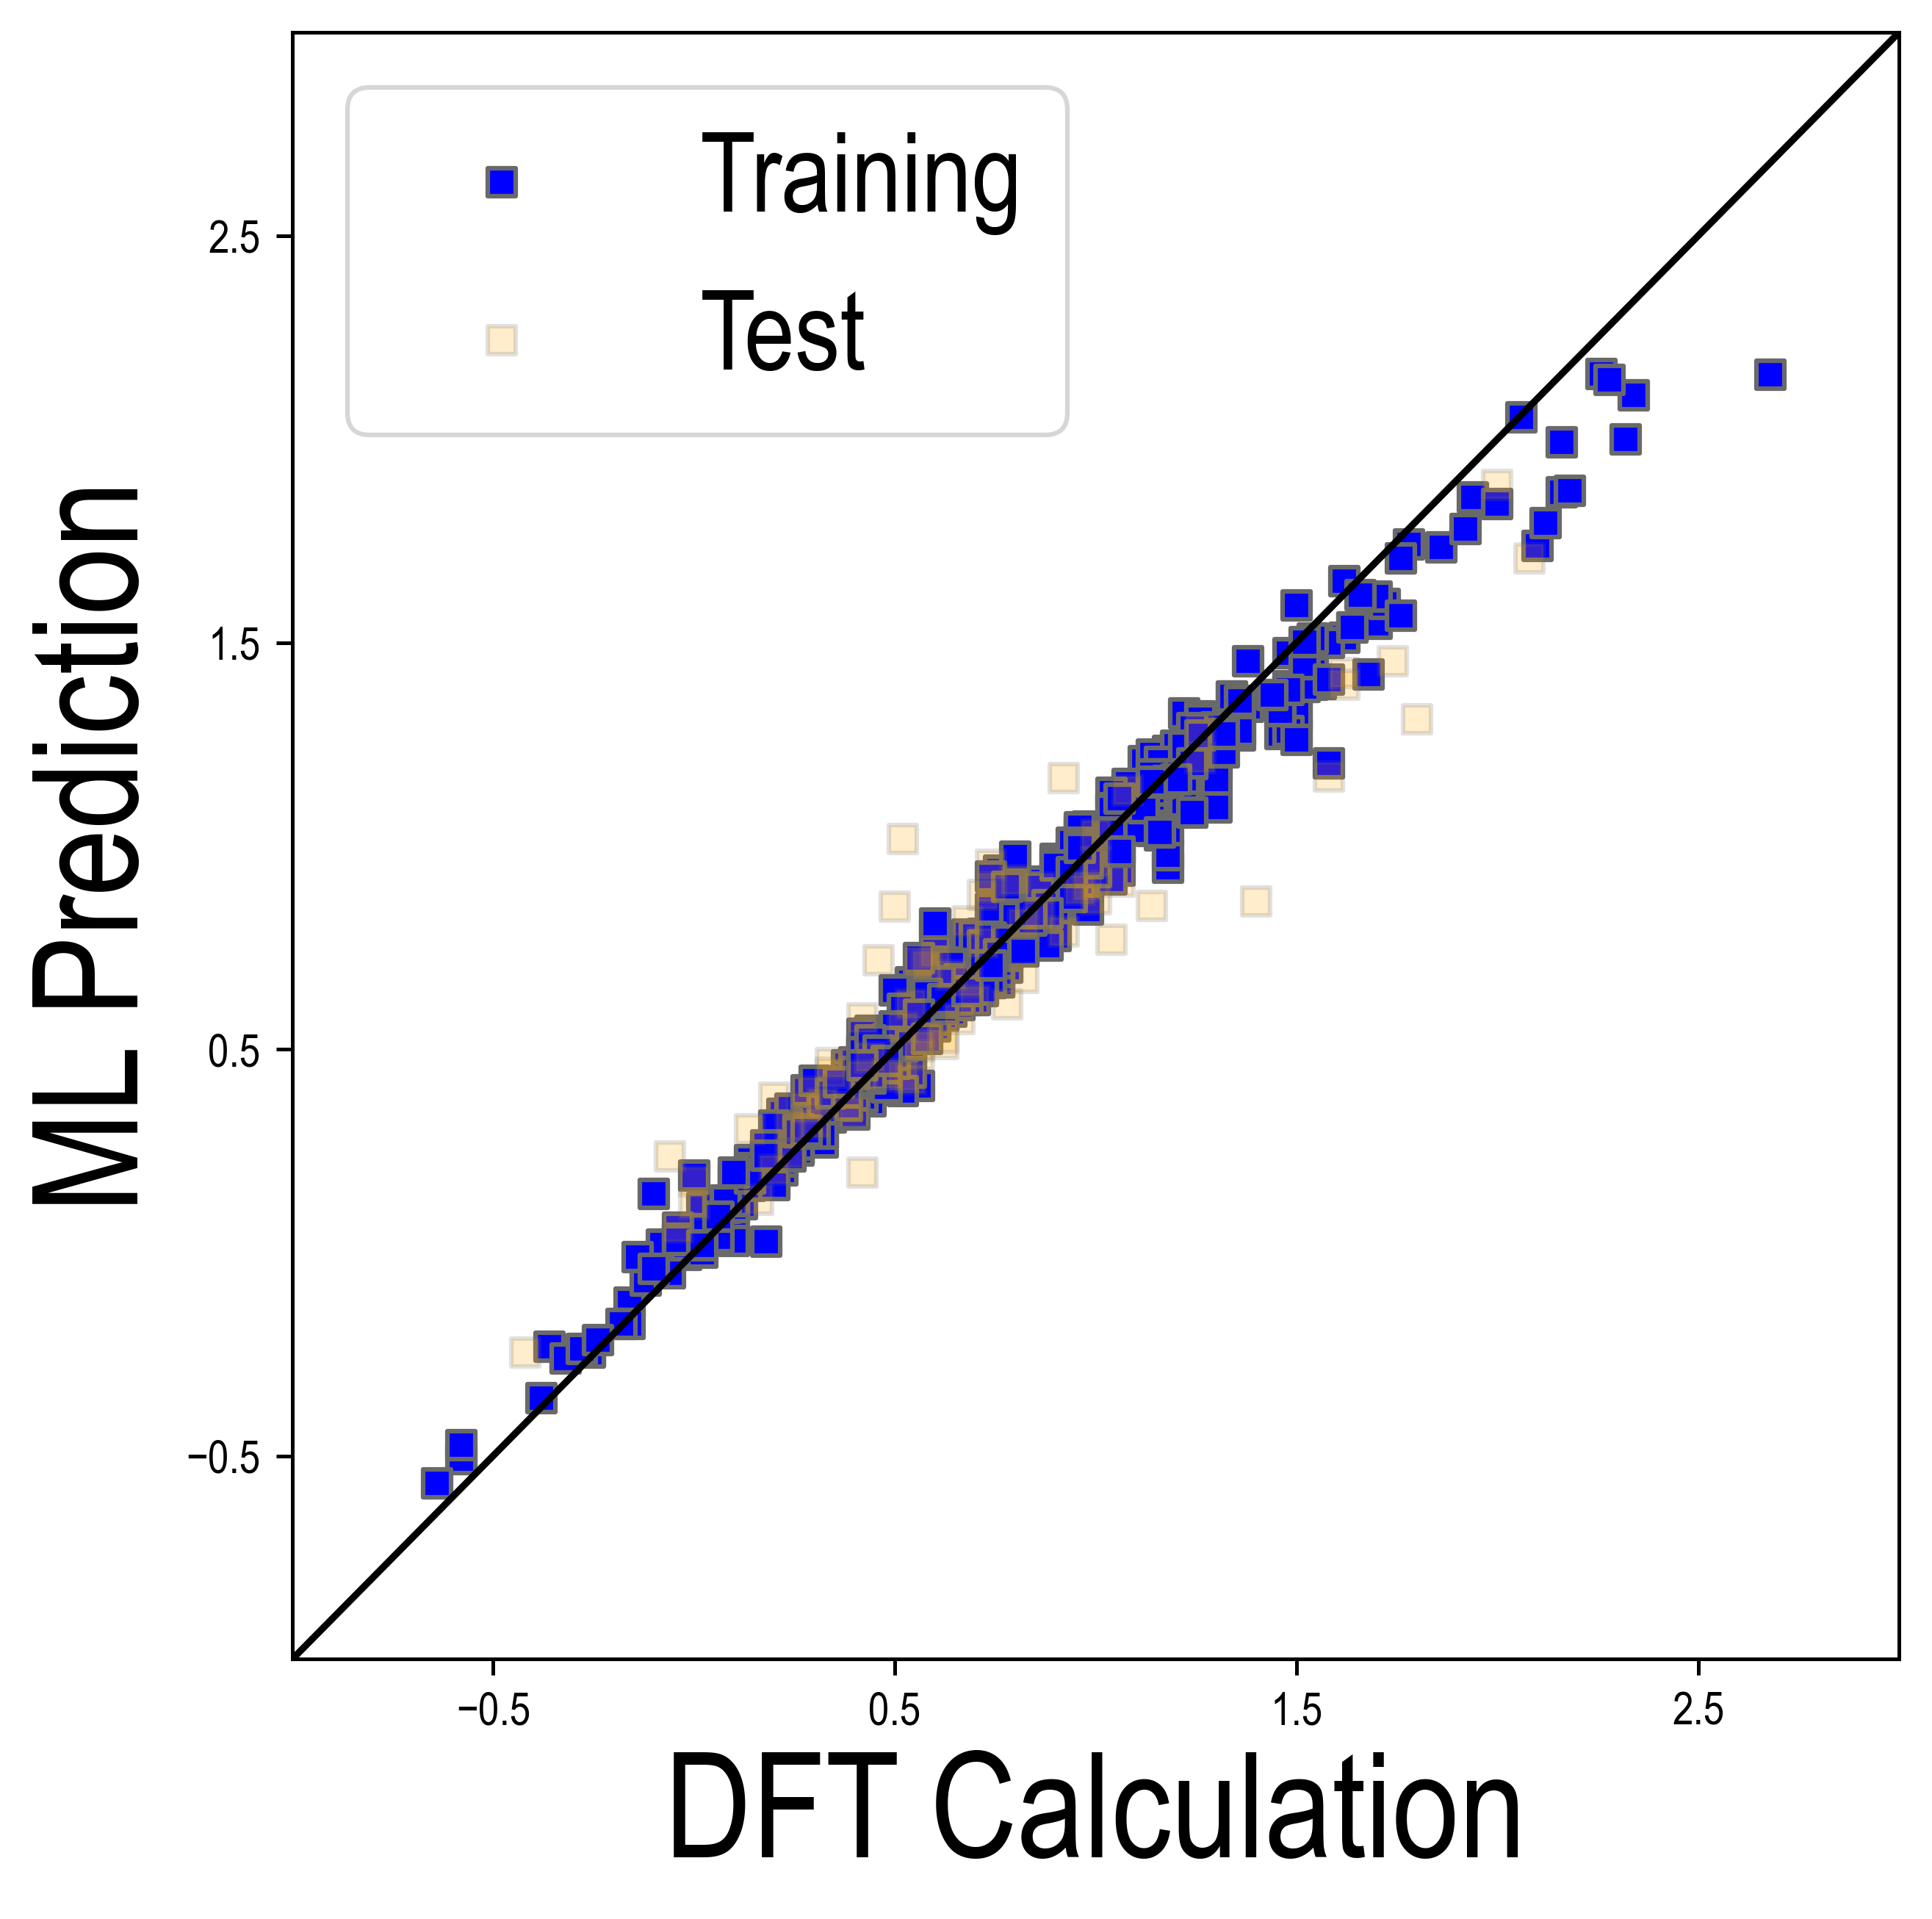

In [13]:
fig=plt.figure(figsize=(6,6),dpi=450)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.96, top=0.97)

a = [-175,0,125]
b = [-175,0,125]

plt.rc('font', family='Arial narrow')

plt.plot(b, a, c='k', ls='-')

plt.ylabel('ML Prediction', fontname='Arial Narrow', size=32)
plt.xlabel('DFT Calculation', fontname='Arial Narrow', size=32)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)

## Lattice constant
#plt.ylim([3.2,5.3])
#plt.xlim([3.2,5.3])
#plt.xticks([3.5, 4, 4.5, 5])
#plt.yticks([3.5, 4, 4.5, 5])

## Direct_gap
#plt.ylim([-0.5,8.5])
#plt.xlim([-0.5,8.5])
#plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0])
#plt.yticks([0.0, 2.0, 4.0, 6.0, 8.0])

## Ind_gap
#plt.ylim([-0.5,8.5])
#plt.xlim([-0.5,8.5])
#plt.xticks([0.0, 2, 4, 6, 8])
#plt.yticks([0.0, 2, 4, 6, 8])

## Formation_energy
plt.ylim([-1.0,3.0])
plt.xlim([-1.0,3.0])
plt.xticks([-0.5, 0.5, 1.5, 2.5])
plt.yticks([-0.5, 0.5, 1.5, 2.5])

plt.scatter(Prop_train_fl[:], Pred_train_fl[:], c='blue', marker='s',edgecolors='dimgrey', alpha=1.0, label='Training')
plt.scatter(Prop_test_fl[:], Pred_test_fl[:], c='orange', marker='s', edgecolors='dimgrey', alpha=0.2, label='Test')

plt.legend(loc='upper left',ncol=1, frameon=True, prop={'family':'Arial narrow','size':24})
plt.savefig('plot.eps', dpi=450)
#plt.show()
